In [1]:
import pandas as pd

# Load the cleaned and fixed data
data = pd.read_csv('../data/processed/merged_df_cleaned_fixed.csv')
data_df = data.copy()

In [2]:
data_df = data_df.loc[data_df['state'] == 'Completed']
data_df['discount'] = data_df['price'] - data_df['unit_price']
data_df['discount_percent'] = round(data_df['discount'] / data_df['price'] * 100,2)
data_df['discount_percent'].describe()

count    57845.000000
mean        20.429286
std         17.192114
min        -81.340000
25%          8.110000
50%         16.930000
75%         27.440000
max         79.960000
Name: discount_percent, dtype: float64

In [3]:
data_df['price_below_unit'] = data_df['unit_price'] > data_df['price']
data_df['price_below_unit'].value_counts(normalize=True)

price_below_unit
False    0.972945
True     0.027055
Name: proportion, dtype: float64

In [4]:
new_df = data_df.copy()
new_df = data_df.loc[data_df["price_below_unit"] == False]
new_df['created_date'] = pd.to_datetime(new_df['created_date'])
new_df['date'] = pd.to_datetime(new_df['date'])

C:\Users\robin\AppData\Local\Temp\ipykernel_83460\3797992568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_date'] = pd.to_datetime(new_df['created_date'])
C:\Users\robin\AppData\Local\Temp\ipykernel_83460\3797992568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = pd.to_datetime(new_df['date'])


In [5]:
new_df.sample(5)

,sku,name,desc,in_stock,type,brand_code,brand_name,id,id_order,product_id,...,date,created_date,total_paid,state,price,promo_price,unit_price,discount,discount_percent,price_below_unit
39189,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,1,11935397,LAC,LaCie,1291501,376789,0,...,2017-07-13 10:56:10,2017-07-13 11:02:32,136.98,Completed,139.99,114.99,129.99,10.00,7.14,False
6978,WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,1,12655397,WDT,Western Digital,1526432,476964,0,...,2017-12-29 23:32:46,2017-12-29 23:39:00,630.88,Completed,169.00,125.99,129.20,39.80,23.55,False
244750,APP2502,Apple Watch GPS 42mm Series 3 Aluminum Case Go...,42mm Apple Watch series 3 with GPS altimeter a...,0,24895185,APP,Apple,1519524,473653,0,...,2017-12-27 17:22:40,2017-12-27 17:30:11,436.06,Completed,399.00,391.00,386.09,12.91,3.24,False
4826,DLK0008,D-Link DCS-932L Wireless IP Camera Cloud,Wireless network camera day and night home wit...,0,9094,DLK,D-Link,1585625,500532,0,...,2018-01-29 01:07:08,2018-01-29 01:11:45,54.98,Completed,79.99,48.99,47.99,32.00,40.01,False
235061,AP20321,Like new - Apple iPhone 7 32GB Gold,Apple iPhone 32GB 7 plus free gold reconditioned,0,85641716,AP2,Apple,1370923,409012,0,...,2017-10-05 18:04:57,2017-10-05 18:16:00,570.33,Completed,639.00,519.01,570.33,68.67,10.75,False


In [6]:
black_week_mask = (new_df['created_date'] >= '2017-11-20') & (new_df['created_date'] <= '2017-11-27 23:59:59')
black_week_df = new_df.loc[black_week_mask].copy() 
non_black_week_df = new_df.loc[~black_week_mask].copy() 

black_week_df['created_date'] = pd.to_datetime(black_week_df['created_date'])
non_black_week_df['created_date'] = pd.to_datetime(non_black_week_df['created_date'])

C:\Users\robin\AppData\Local\Temp\ipykernel_83460\650632992.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Period', y='Average Discount %', data=data, palette=colors, edgecolor='black', linewidth=1.5)


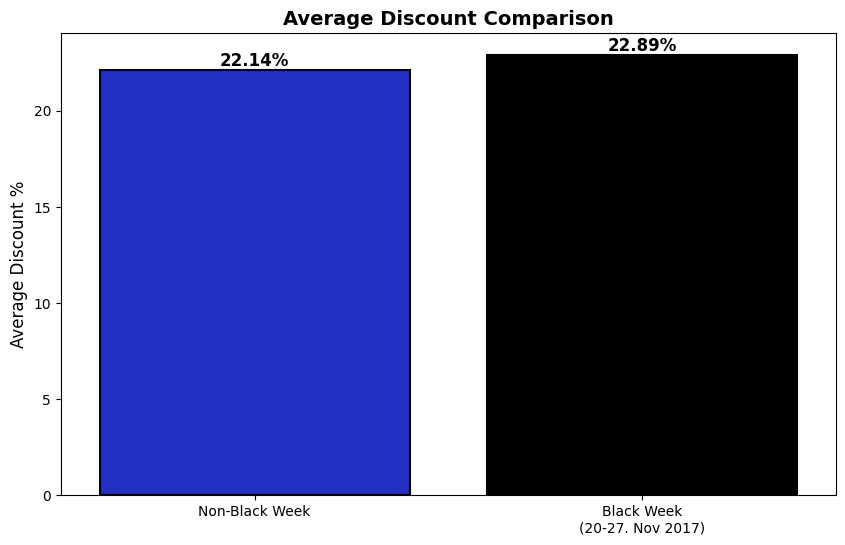

Non-Black Week Average Discount: 22.14%
Black Week Average Discount: 22.89%
Difference: 0.76%


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average discounts (only orders with discount)
black_week_avg = black_week_df[black_week_df['discount'] > 0]['discount_percent'].mean()
non_black_week_avg = non_black_week_df[non_black_week_df['discount'] > 0]['discount_percent'].mean()

# Prepare data for Seaborn
data = {
    'Period': ['Non-Black Week', 'Black Week\n(20-27. Nov 2017)'],
    'Average Discount %': [non_black_week_avg, black_week_avg]
}

# Create plot
plt.figure(figsize=(10, 6))
colors = ["#081ade", "#000000"]
ax = sns.barplot(x='Period', y='Average Discount %', data=data, palette=colors, edgecolor='black', linewidth=1.5)

# Values on bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylabel('Average Discount %', fontsize=12)
plt.xlabel('')
plt.title('Average Discount Comparison', fontsize=14, fontweight='bold')
plt.show()

# Print statistics
print(f"Non-Black Week Average Discount: {non_black_week_avg:.2f}%")
print(f"Black Week Average Discount: {black_week_avg:.2f}%")
print(f"Difference: {black_week_avg - non_black_week_avg:.2f}%")

In [8]:
non_black_week_df['discount_percent'].describe()

count    49595.000000
mean        20.946831
std         17.123059
min          0.000000
25%          8.470000
50%         17.080000
75%         27.730000
max         79.830000
Name: discount_percent, dtype: float64

ANALYSIS: WHY SO MANY PURCHASES DURING BLACK WEEK?

### 1. PERCENTAGE OF DISCOUNTED PRODUCTS
--------------------------------------------------------------------------------
Black Week: 99.58% of items were discounted (6,657 of 6,685)
Non-Black Week: 94.62% of items were discounted (46,928 of 49,595)
Difference: 4.96 percentage points


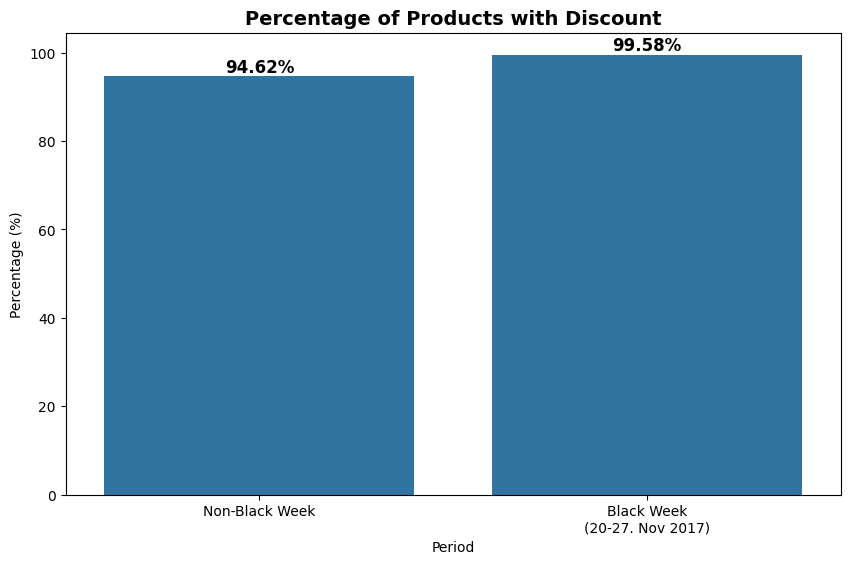


### 2. VARIETY OF DISCOUNTED PRODUCTS
--------------------------------------------------------------------------------
Black Week: 1,801 unique products with discount
Non-Black Week: 5,203 unique products with discount

### 3. DISCOUNT DEPTH DISTRIBUTION
--------------------------------------------------------------------------------
Black Week: 1,475 items with >=30% discount (22.06%)
Non-Black Week: 11,046 items with >=30% discount (22.27%)


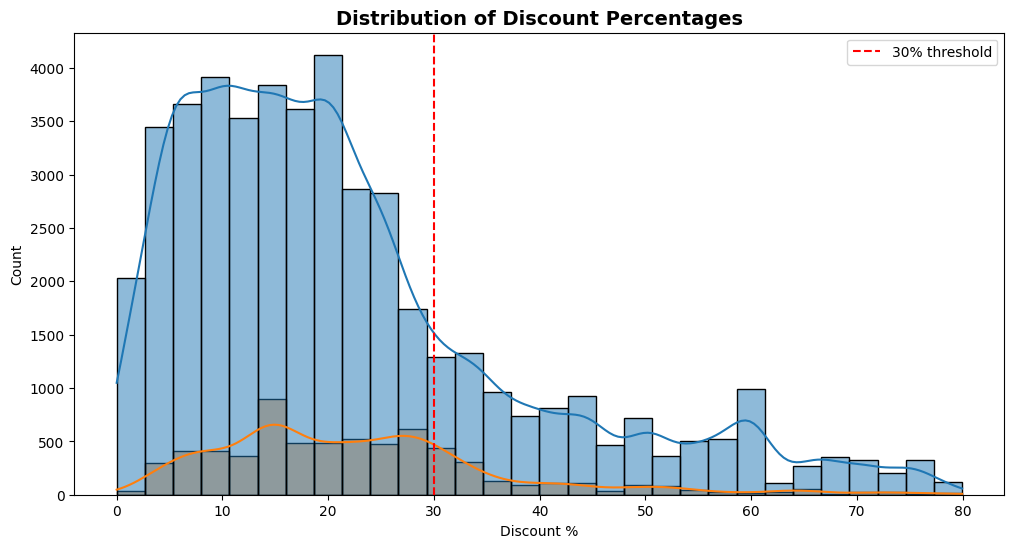


### 4. ORDER VOLUME ANALYSIS
--------------------------------------------------------------------------------
Black Week: 4,822 orders in 7 days = 689 orders/day
Non-Black Week: 38,094 orders in 437 days = 87 orders/day
Black Week had 7.90x more orders per day!


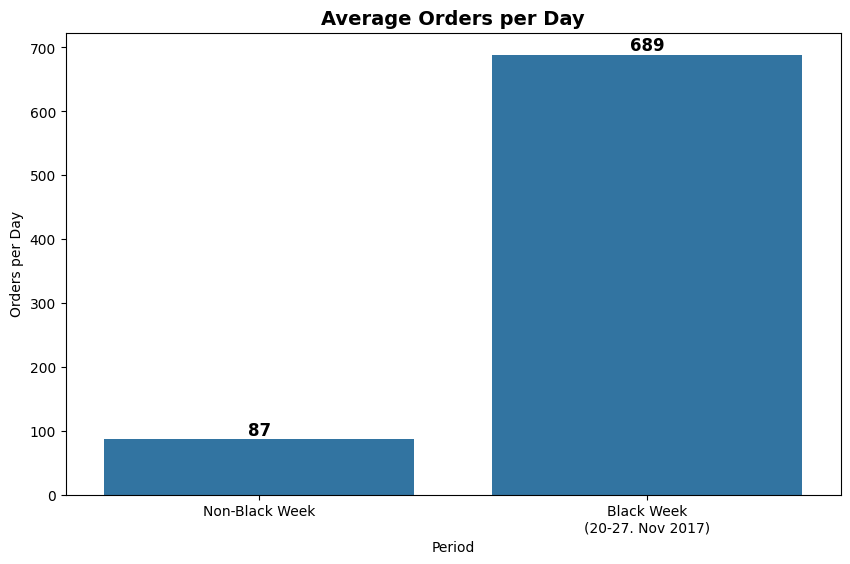


### 5. TOP BRANDS WITH HIGH DISCOUNTS - BLACK WEEK
--------------------------------------------------------------------------------
        brand_name  discount_percent  product_quantity  id_order
0            Apple         17.516203              2123      1678
1          Crucial         20.600808               391       275
2              OWC         28.666636               361       301
3  Western Digital         22.554502               342       226
4            Wacom         23.545952               331       285
5            LaCie         19.854850               249       229
6             Pack         19.100184               223       217
7           Belkin         30.048531               185       167
8          Satechi         29.819345               182       150
9            Sonos         15.198828               172        98


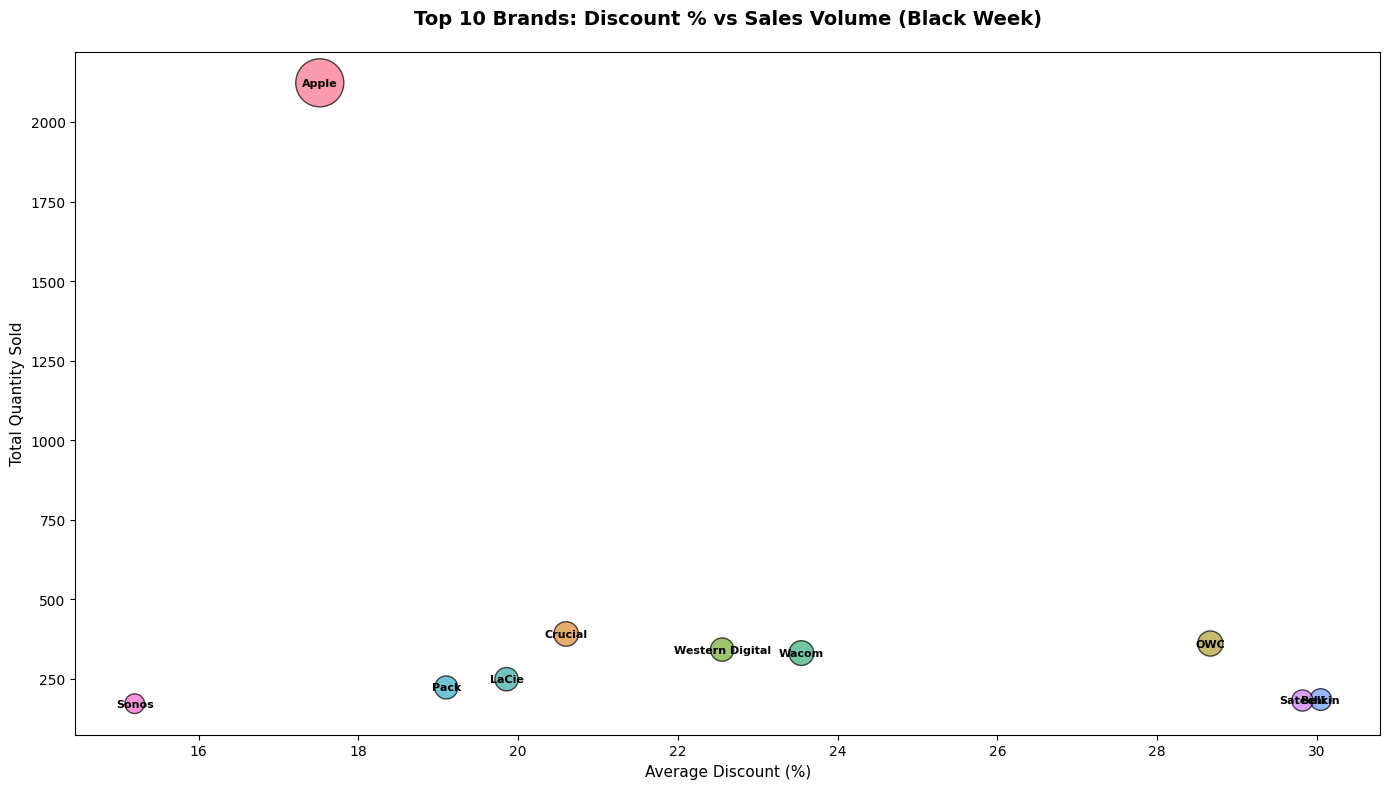


### 6. TOP BRANDS WITH HIGH DISCOUNTS - NON-BLACK WEEK
--------------------------------------------------------------------------------
        brand_name  discount_percent  product_quantity  id_order
0            Apple         16.168498             10770      8741
1              OWC         22.764585              3511      2930
2             Pack         23.017352              2160      2021
3           Belkin         30.732215              2059      1775
4  Western Digital         17.802331              1951      1328
5          Crucial         13.660794              1826      1461
6          Satechi         29.170623              1740      1477
7        NewerTech         35.534880              1522      1315
8            Wacom         20.237092              1481      1325
9            LaCie         12.511777              1435      1321


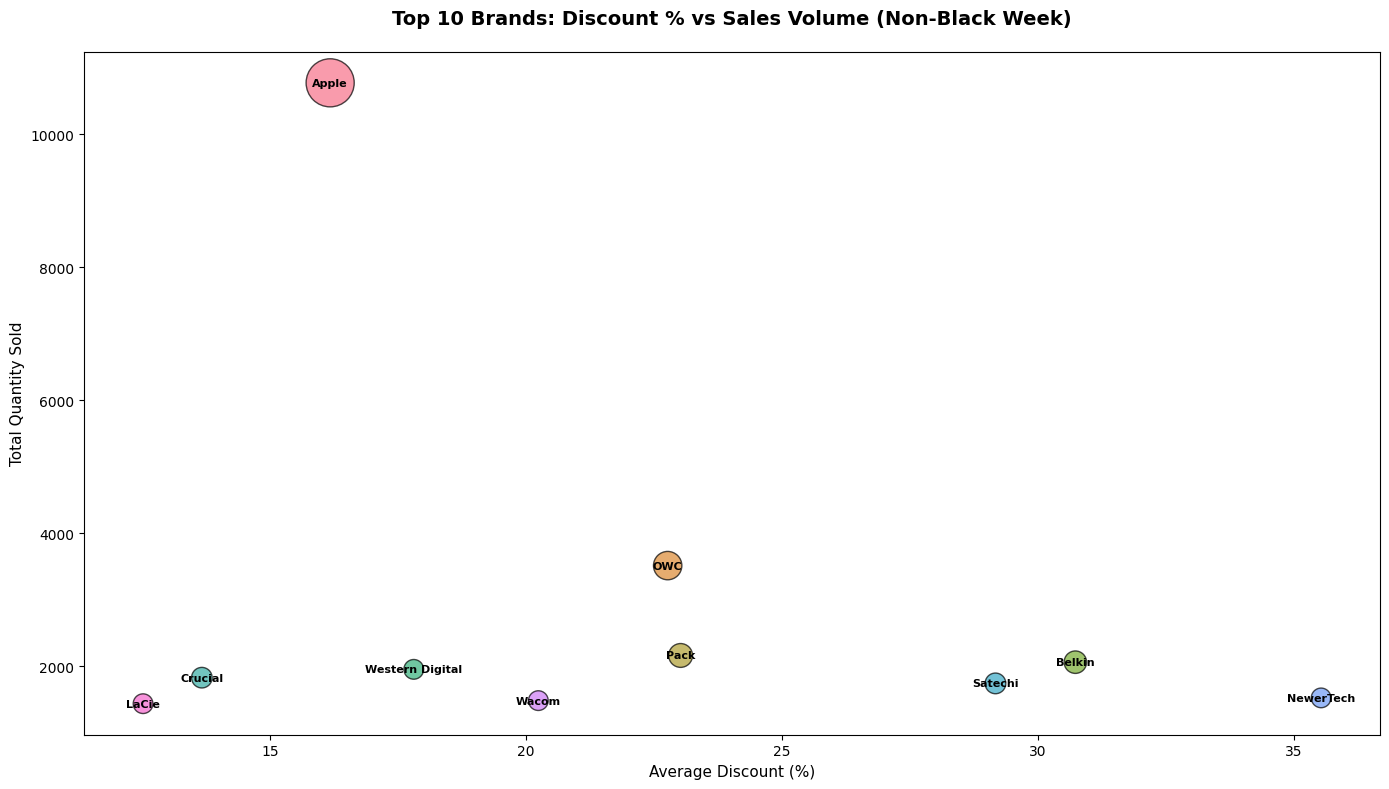


SUMMARY: WHY DID SO MANY CUSTOMERS BUY DURING BLACK WEEK?

1. MORE DISCOUNTED PRODUCTS:
   - Black Week: 99.6% of items were discounted
   - Normal: 94.6% of items were discounted

2. DISCOUNT DEPTH SIMILAR:
   - Black Week: 22.89% average discount
   - Normal: 22.14% average discount

3. MARKETING PSYCHOLOGY:
   - Black Friday is a well-known shopping event
   - Customers expect deals and are ready to buy
   - 7.9x more orders per day!

4. CONCLUSION:
   It's NOT the higher discount, but:
   - The marketing effect of "Black Friday"
   - More products were on sale
   - Timing (before Christmas)
   - General purchase readiness



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("=" * 80)
print("ANALYSIS: WHY SO MANY PURCHASES DURING BLACK WEEK?")
print("=" * 80)

# ============================================================================
# 1. PERCENTAGE OF DISCOUNTED PRODUCTS
# ============================================================================

print("\n### 1. PERCENTAGE OF DISCOUNTED PRODUCTS")
print("-" * 80)

# How many products were actually discounted?
black_week_with_discount = (black_week_df['discount'] > 0).sum()
black_week_total = len(black_week_df)
black_week_discount_ratio = black_week_with_discount / black_week_total * 100

non_black_week_with_discount = (non_black_week_df['discount'] > 0).sum()
non_black_week_total = len(non_black_week_df)
non_black_week_discount_ratio = non_black_week_with_discount / non_black_week_total * 100

print(f"Black Week: {black_week_discount_ratio:.2f}% of items were discounted ({black_week_with_discount:,} of {black_week_total:,})")
print(f"Non-Black Week: {non_black_week_discount_ratio:.2f}% of items were discounted ({non_black_week_with_discount:,} of {non_black_week_total:,})")
print(f"Difference: {black_week_discount_ratio - non_black_week_discount_ratio:.2f} percentage points")

# Plot
plt.figure(figsize=(10, 6))
data_discount_ratio = pd.DataFrame({
    'Period': ['Non-Black Week', 'Black Week\n(20-27. Nov 2017)'],
    'Percentage with Discount': [non_black_week_discount_ratio, black_week_discount_ratio]
})
ax = sns.barplot(x='Period', y='Percentage with Discount', data=data_discount_ratio)
plt.title('Percentage of Products with Discount', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

# ============================================================================
# 2. VARIETY OF DISCOUNTED PRODUCTS
# ============================================================================

print("\n### 2. VARIETY OF DISCOUNTED PRODUCTS")
print("-" * 80)

black_week_unique_discounted = black_week_df[black_week_df['discount'] > 0]['sku'].nunique()
non_black_week_unique_discounted = non_black_week_df[non_black_week_df['discount'] > 0]['sku'].nunique()

print(f"Black Week: {black_week_unique_discounted:,} unique products with discount")
print(f"Non-Black Week: {non_black_week_unique_discounted:,} unique products with discount")

# ============================================================================
# 3. DISCOUNT DEPTH ANALYSIS (Distribution)
# ============================================================================

print("\n### 3. DISCOUNT DEPTH DISTRIBUTION")
print("-" * 80)

# How are discounts distributed?
black_week_high_discount = (black_week_df['discount_percent'] >= 30).sum()
non_black_week_high_discount = (non_black_week_df['discount_percent'] >= 30).sum()

print(f"Black Week: {black_week_high_discount:,} items with >=30% discount ({black_week_high_discount/black_week_total*100:.2f}%)")
print(f"Non-Black Week: {non_black_week_high_discount:,} items with >=30% discount ({non_black_week_high_discount/non_black_week_total*100:.2f}%)")

# Distribution Plot
plt.figure(figsize=(12, 6))
data_hist = pd.DataFrame({
    'discount_percent': list(non_black_week_df[non_black_week_df['discount'] > 0]['discount_percent']) + 
                        list(black_week_df[black_week_df['discount'] > 0]['discount_percent']),
    'Period': ['Non-Black Week'] * len(non_black_week_df[non_black_week_df['discount'] > 0]) + 
              ['Black Week'] * len(black_week_df[black_week_df['discount'] > 0])
})
sns.histplot(data=data_hist, x='discount_percent', hue='Period', bins=30, kde=True)
plt.title('Distribution of Discount Percentages', fontsize=14, fontweight='bold')
plt.xlabel('Discount %')
plt.ylabel('Count')
plt.axvline(x=30, color='red', linestyle='--', label='30% threshold')
plt.legend()
plt.show()

# ============================================================================
# 4. MARKETING PSYCHOLOGY: BLACK FRIDAY EFFECT
# ============================================================================

print("\n### 4. ORDER VOLUME ANALYSIS")
print("-" * 80)

# Number of orders
black_week_orders_count = black_week_df['id_order'].nunique()
non_black_week_orders_count = non_black_week_df['id_order'].nunique()

# Average duration of non-black-week in days
non_black_week_days = (non_black_week_df['created_date'].max() - non_black_week_df['created_date'].min()).days
black_week_days = 7

orders_per_day_non_black = non_black_week_orders_count / non_black_week_days
orders_per_day_black = black_week_orders_count / black_week_days

print(f"Black Week: {black_week_orders_count:,} orders in {black_week_days} days = {orders_per_day_black:.0f} orders/day")
print(f"Non-Black Week: {non_black_week_orders_count:,} orders in {non_black_week_days} days = {orders_per_day_non_black:.0f} orders/day")
print(f"Black Week had {orders_per_day_black/orders_per_day_non_black:.2f}x more orders per day!")

plt.figure(figsize=(10, 6))
data_orders = pd.DataFrame({
    'Period': ['Non-Black Week', 'Black Week\n(20-27. Nov 2017)'],
    'Orders per Day': [orders_per_day_non_black, orders_per_day_black]
})
ax = sns.barplot(x='Period', y='Orders per Day', data=data_orders)
plt.title('Average Orders per Day', fontsize=14, fontweight='bold')
plt.ylabel('Orders per Day')
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

# ============================================================================
# 5. WHICH BRANDS WERE HEAVILY DISCOUNTED?
# ============================================================================

print("\n### 5. TOP BRANDS WITH HIGH DISCOUNTS - BLACK WEEK")
print("-" * 80)

# Aggregation
black_week_brand_analysis = black_week_df[black_week_df['discount'] > 0].groupby('brand_name').agg({
    'discount_percent': 'mean',
    'product_quantity': 'sum',
    'id_order': 'nunique'
}).sort_values('product_quantity', ascending=False).head(10).reset_index()

print(black_week_brand_analysis)

# Visualization
plt.figure(figsize=(14, 8))

# Scatterplot without legend
sns.scatterplot(
    data=black_week_brand_analysis, 
    x='discount_percent', 
    y='product_quantity',
    size='id_order', 
    hue='brand_name', 
    sizes=(200, 1200),
    palette='husl',
    alpha=0.7,
    edgecolor='black',
    linewidth=1,
    legend=False
)

# Labels for each brand
for i, row in black_week_brand_analysis.iterrows():
    plt.text(
        row['discount_percent'], 
        row['product_quantity'], 
        row['brand_name'],
        fontsize=8,
        ha='center',
        va='center',
        fontweight='bold'
    )

plt.title('Top 10 Brands: Discount % vs Sales Volume (Black Week)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Average Discount (%)', fontsize=11)
plt.ylabel('Total Quantity Sold', fontsize=11)
plt.tight_layout()
plt.show()

# ============================================================================
# 6. WHICH BRANDS WERE HEAVILY DISCOUNTED IN NON-BLACK WEEK?
# ============================================================================


print("\n### 6. TOP BRANDS WITH HIGH DISCOUNTS - NON-BLACK WEEK")
print("-" * 80)

# Aggregation
non_black_week_brand_analysis = non_black_week_df[non_black_week_df['discount'] > 0].groupby('brand_name').agg({
    'discount_percent': 'mean',
    'product_quantity': 'sum',
    'id_order': 'nunique'
}).sort_values('product_quantity', ascending=False).head(10).reset_index()

print(non_black_week_brand_analysis)

# Visualization
plt.figure(figsize=(14, 8))

# Scatterplot without legend
sns.scatterplot(
    data=non_black_week_brand_analysis, 
    x='discount_percent', 
    y='product_quantity',
    size='id_order', 
    hue='brand_name', 
    sizes=(200, 1200),
    palette='husl',
    alpha=0.7,
    edgecolor='black',
    linewidth=1,
    legend=False
)

# Labels for each brand
for i, row in non_black_week_brand_analysis.iterrows():
    plt.text(
        row['discount_percent'], 
        row['product_quantity'], 
        row['brand_name'],
        fontsize=8,
        ha='center',
        va='center',
        fontweight='bold'
    )

plt.title('Top 10 Brands: Discount % vs Sales Volume (Non-Black Week)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Average Discount (%)', fontsize=11)
plt.ylabel('Total Quantity Sold', fontsize=11)
plt.tight_layout()
plt.show()



# ============================================================================
# 7. SUMMARY
# ============================================================================

print("\n" + "=" * 80)
print("SUMMARY: WHY DID SO MANY CUSTOMERS BUY DURING BLACK WEEK?")
print("=" * 80)
print(f"""
1. MORE DISCOUNTED PRODUCTS:
   - Black Week: {black_week_discount_ratio:.1f}% of items were discounted
   - Normal: {non_black_week_discount_ratio:.1f}% of items were discounted
   
2. DISCOUNT DEPTH SIMILAR:
   - Black Week: {black_week_avg:.2f}% average discount
   - Normal: {non_black_week_avg:.2f}% average discount
   
3. MARKETING PSYCHOLOGY:
   - Black Friday is a well-known shopping event
   - Customers expect deals and are ready to buy
   - {orders_per_day_black/orders_per_day_non_black:.1f}x more orders per day!
   
4. CONCLUSION:
   It's NOT the higher discount, but:
   - The marketing effect of "Black Friday"
   - More products were on sale
   - Timing (before Christmas)
   - General purchase readiness
""")

EXTENDED ANALYSIS: REVENUE, RETENTION & BASKET VALUE

### 1. REVENUE ANALYSIS
--------------------------------------------------------------------------------
Black Week Total Revenue: 2,095,316.88€
Non-Black Week Total Revenue: 12,521,666.10€

Black Week Revenue per Day: 299,330.98€
Non-Black Week Revenue per Day: 28,653.70€
Black Week had 10.45x more revenue per day!


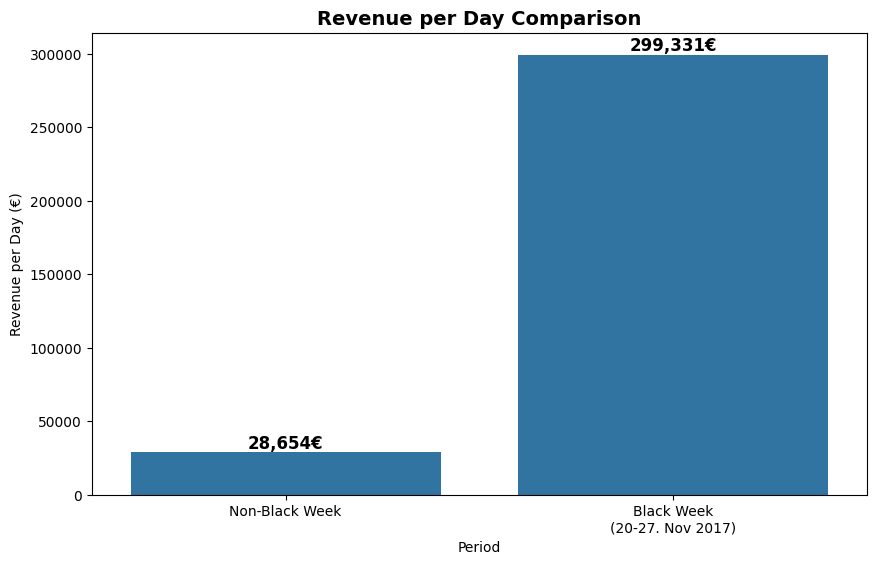


### 2. BASKET VALUE ANALYSIS
--------------------------------------------------------------------------------
Black Week Average Basket Value: 434.53€
Non-Black Week Average Basket Value: 328.70€
Difference: 105.83€ (32.20%)

Black Week Median Basket Value: 172.98€
Non-Black Week Median Basket Value: 103.98€


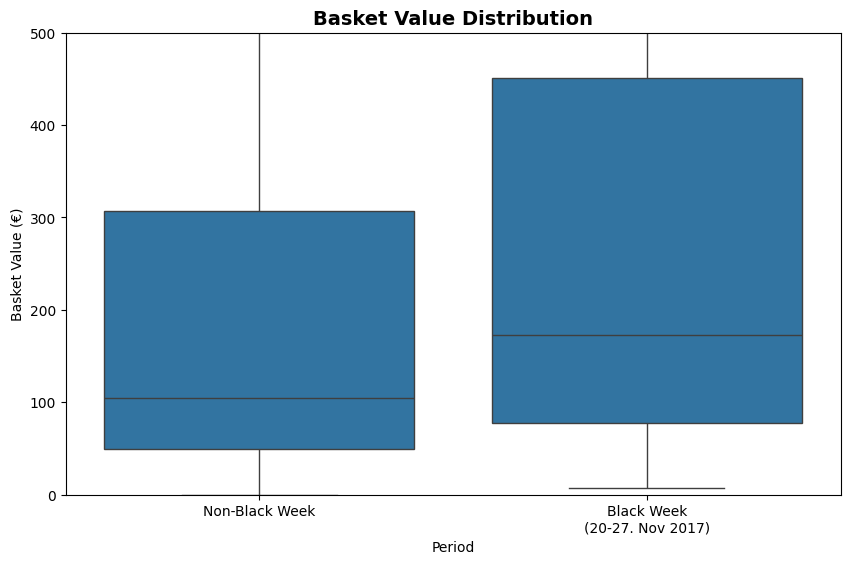

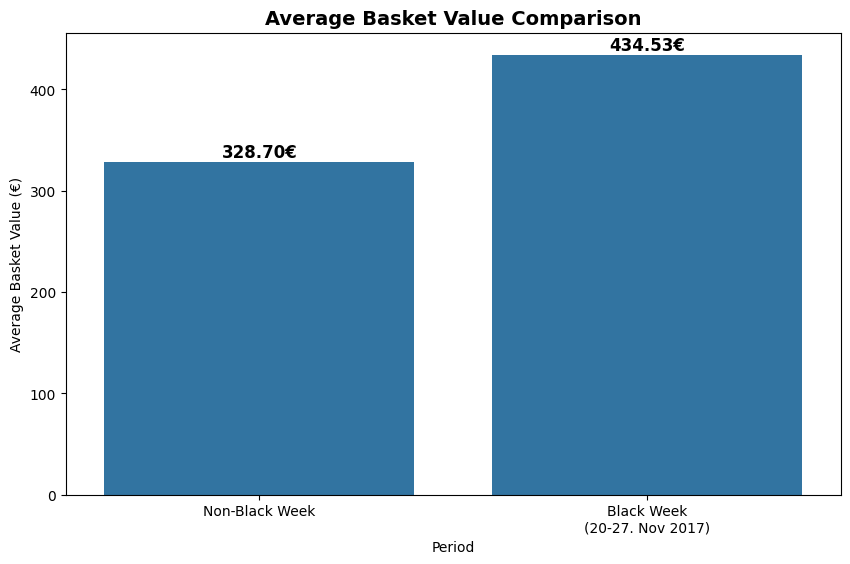


### 3. PRODUCTS PER ORDER
--------------------------------------------------------------------------------
Black Week - Average Products per Order: 1.39
Non-Black Week - Average Products per Order: 1.30

Black Week - Average Quantity per Order: 1.57
Non-Black Week - Average Quantity per Order: 1.46


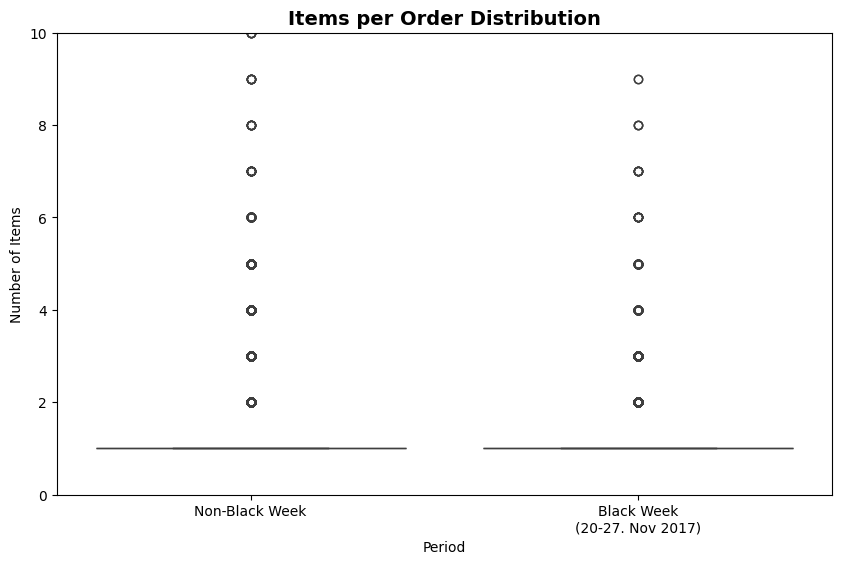


### 4. CUSTOMER RETENTION ANALYSIS
--------------------------------------------------------------------------------
Black Week - Orders with multiple products: 24.99% (1,205 of 4,822)
Non-Black Week - Orders with multiple products: 20.91% (7,965 of 38,094)


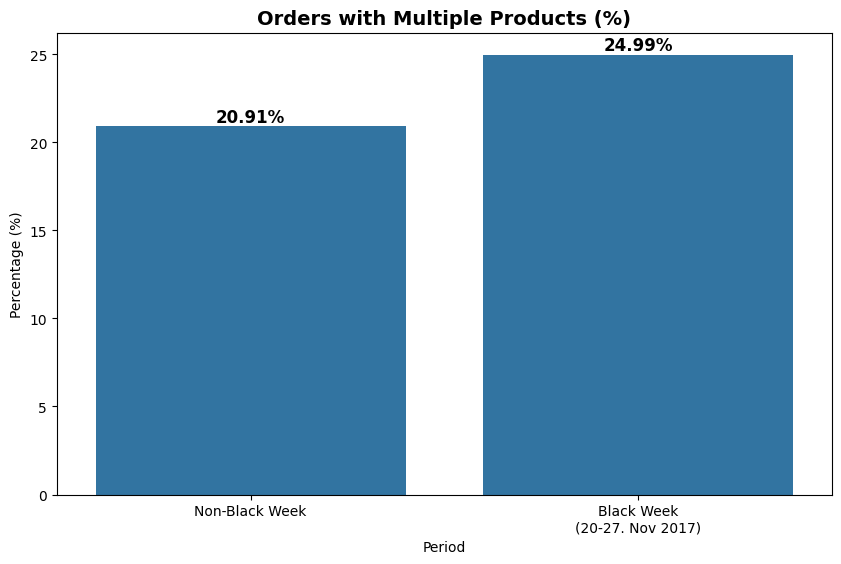


SUMMARY - KEY METRICS
                           Metric Non-Black Week Black Week Ratio (BW/NBW)
                   Orders per Day             87        689          7.90x
              Revenue per Day (€)        28,654€   299,331€         10.45x
             Avg Basket Value (€)        328.70€    434.53€          1.32x
              Avg Items per Order           1.30       1.39          1.06x
Orders with Multiple Products (%)          20.9%      25.0%          1.20x
                 Avg Discount (%)         22.14%     22.89%          1.03x

BUSINESS INSIGHTS FOR THE BOARD

1. REVENUE IMPACT:
   - 10.4x more revenue per day during Black Week
   - Despite moderate discounts (22.9%)
   -> Discounts are PROFITABLE with the right marketing timing!

2. BASKET VALUE:
   [+] Basket value: 434.53€ vs 328.70€ (+105.83€)
   -> Customers spend MORE per order!

3. CUSTOMER ENGAGEMENT:
   [+] 25.0% orders with multiple products (vs 20.9%)
   -> Customers buy more products per order!

4. BOARD'S CO

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("=" * 80)
print("EXTENDED ANALYSIS: REVENUE, RETENTION & BASKET VALUE")
print("=" * 80)

# ============================================================================
# 1. REVENUE ANALYSIS
# ============================================================================

print("\n### 1. REVENUE ANALYSIS")
print("-" * 80)

# Total revenue
black_week_revenue = black_week_df.groupby('id_order')['total_paid'].first().sum()
non_black_week_revenue = non_black_week_df.groupby('id_order')['total_paid'].first().sum()

# Revenue per day
black_week_revenue_per_day = black_week_revenue / 7
non_black_week_revenue_per_day = non_black_week_revenue / non_black_week_days

print(f"Black Week Total Revenue: {black_week_revenue:,.2f}€")
print(f"Non-Black Week Total Revenue: {non_black_week_revenue:,.2f}€")
print(f"\nBlack Week Revenue per Day: {black_week_revenue_per_day:,.2f}€")
print(f"Non-Black Week Revenue per Day: {non_black_week_revenue_per_day:,.2f}€")
print(f"Black Week had {black_week_revenue_per_day/non_black_week_revenue_per_day:.2f}x more revenue per day!")

# PLOT: Revenue per Day
plt.figure(figsize=(10, 6))
data_revenue = pd.DataFrame({
    'Period': ['Non-Black Week', 'Black Week\n(20-27. Nov 2017)'],
    'Revenue per Day (€)': [non_black_week_revenue_per_day, black_week_revenue_per_day]
})
ax = sns.barplot(x='Period', y='Revenue per Day (€)', data=data_revenue)
plt.title('Revenue per Day Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Revenue per Day (€)')
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,.0f}€', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

# ============================================================================
# 2. BASKET VALUE ANALYSIS
# ============================================================================

print("\n### 2. BASKET VALUE ANALYSIS")
print("-" * 80)

# Average basket value
black_week_basket = black_week_df.groupby('id_order')['total_paid'].first()
non_black_week_basket = non_black_week_df.groupby('id_order')['total_paid'].first()

black_week_avg_basket = black_week_basket.mean()
non_black_week_avg_basket = non_black_week_basket.mean()

print(f"Black Week Average Basket Value: {black_week_avg_basket:.2f}€")
print(f"Non-Black Week Average Basket Value: {non_black_week_avg_basket:.2f}€")
print(f"Difference: {black_week_avg_basket - non_black_week_avg_basket:.2f}€ ({((black_week_avg_basket/non_black_week_avg_basket)-1)*100:.2f}%)")

# Median basket value
print(f"\nBlack Week Median Basket Value: {black_week_basket.median():.2f}€")
print(f"Non-Black Week Median Basket Value: {non_black_week_basket.median():.2f}€")

# PLOT: Basket Value Comparison
plt.figure(figsize=(10, 6))
data_basket = pd.DataFrame({
    'Period': ['Non-Black Week'] * len(non_black_week_basket) + 
              ['Black Week\n(20-27. Nov 2017)'] * len(black_week_basket),
    'Basket Value (€)': list(non_black_week_basket) + list(black_week_basket)
})
sns.boxplot(x='Period', y='Basket Value (€)', data=data_basket)
plt.title('Basket Value Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Basket Value (€)')
plt.ylim(0, 500)  # Limit for better visualization
plt.show()

# PLOT: Average Basket Value Bar Chart
plt.figure(figsize=(10, 6))
data_avg_basket = pd.DataFrame({
    'Period': ['Non-Black Week', 'Black Week\n(20-27. Nov 2017)'],
    'Average Basket Value (€)': [non_black_week_avg_basket, black_week_avg_basket]
})
ax = sns.barplot(x='Period', y='Average Basket Value (€)', data=data_avg_basket)
plt.title('Average Basket Value Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Average Basket Value (€)')
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}€', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

# ============================================================================
# 3. PRODUCTS PER ORDER
# ============================================================================

print("\n### 3. PRODUCTS PER ORDER")
print("-" * 80)

# Number of products (rows) per order
black_week_items_per_order = black_week_df.groupby('id_order').size()
non_black_week_items_per_order = non_black_week_df.groupby('id_order').size()

# Total quantity per order
black_week_quantity_per_order = black_week_df.groupby('id_order')['product_quantity'].sum()
non_black_week_quantity_per_order = non_black_week_df.groupby('id_order')['product_quantity'].sum()

print(f"Black Week - Average Products per Order: {black_week_items_per_order.mean():.2f}")
print(f"Non-Black Week - Average Products per Order: {non_black_week_items_per_order.mean():.2f}")
print(f"\nBlack Week - Average Quantity per Order: {black_week_quantity_per_order.mean():.2f}")
print(f"Non-Black Week - Average Quantity per Order: {non_black_week_quantity_per_order.mean():.2f}")

# PLOT: Items per Order
plt.figure(figsize=(10, 6))
data_items = pd.DataFrame({
    'Period': ['Non-Black Week'] * len(non_black_week_items_per_order) + 
              ['Black Week\n(20-27. Nov 2017)'] * len(black_week_items_per_order),
    'Items per Order': list(non_black_week_items_per_order) + list(black_week_items_per_order)
})
sns.boxplot(x='Period', y='Items per Order', data=data_items)
plt.title('Items per Order Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Items')
plt.ylim(0, 10)  # Limit for better visualization
plt.show()

# ============================================================================
# 4. CUSTOMER RETENTION - Returning Customers
# ============================================================================

print("\n### 4. CUSTOMER RETENTION ANALYSIS")
print("-" * 80)

# Note: We don't have customer IDs, but we can analyze orders
# Let's look at how many orders come from the same "patterns"

# Multi-Order Analysis
black_week_order_count = black_week_df['id_order'].nunique()
non_black_week_order_count = non_black_week_df['id_order'].nunique()

# Orders with multiple products (as proxy for "engaged" customers)
black_week_multi_item = (black_week_items_per_order > 1).sum()
non_black_week_multi_item = (non_black_week_items_per_order > 1).sum()

black_week_multi_pct = black_week_multi_item / black_week_order_count * 100
non_black_week_multi_pct = non_black_week_multi_item / non_black_week_order_count * 100

print(f"Black Week - Orders with multiple products: {black_week_multi_pct:.2f}% ({black_week_multi_item:,} of {black_week_order_count:,})")
print(f"Non-Black Week - Orders with multiple products: {non_black_week_multi_pct:.2f}% ({non_black_week_multi_item:,} of {non_black_week_order_count:,})")

# PLOT: Multi-Product Orders
plt.figure(figsize=(10, 6))
data_multi = pd.DataFrame({
    'Period': ['Non-Black Week', 'Black Week\n(20-27. Nov 2017)'],
    'Percentage with Multiple Products': [non_black_week_multi_pct, black_week_multi_pct]
})
ax = sns.barplot(x='Period', y='Percentage with Multiple Products', data=data_multi)
plt.title('Orders with Multiple Products (%)', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

# ============================================================================
# 5. SUMMARY DASHBOARD
# ============================================================================

print("\n" + "=" * 80)
print("SUMMARY - KEY METRICS")
print("=" * 80)

summary = pd.DataFrame({
    'Metric': [
        'Orders per Day',
        'Revenue per Day (€)',
        'Avg Basket Value (€)',
        'Avg Items per Order',
        'Orders with Multiple Products (%)',
        'Avg Discount (%)'
    ],
    'Non-Black Week': [
        f"{orders_per_day_non_black:.0f}",
        f"{non_black_week_revenue_per_day:,.0f}€",
        f"{non_black_week_avg_basket:.2f}€",
        f"{non_black_week_items_per_order.mean():.2f}",
        f"{non_black_week_multi_pct:.1f}%",
        f"{non_black_week_avg:.2f}%"
    ],
    'Black Week': [
        f"{orders_per_day_black:.0f}",
        f"{black_week_revenue_per_day:,.0f}€",
        f"{black_week_avg_basket:.2f}€",
        f"{black_week_items_per_order.mean():.2f}",
        f"{black_week_multi_pct:.1f}%",
        f"{black_week_avg:.2f}%"
    ],
    'Ratio (BW/NBW)': [
        f"{orders_per_day_black/orders_per_day_non_black:.2f}x",
        f"{black_week_revenue_per_day/non_black_week_revenue_per_day:.2f}x",
        f"{black_week_avg_basket/non_black_week_avg_basket:.2f}x",
        f"{black_week_items_per_order.mean()/non_black_week_items_per_order.mean():.2f}x",
        f"{black_week_multi_pct/non_black_week_multi_pct:.2f}x",
        f"{black_week_avg/non_black_week_avg:.2f}x"
    ]
})

print(summary.to_string(index=False))

# ============================================================================
# 6. BUSINESS INSIGHTS
# ============================================================================

print("\n" + "=" * 80)
print("BUSINESS INSIGHTS FOR THE BOARD")
print("=" * 80)

print(f"""
1. REVENUE IMPACT:
   - {black_week_revenue_per_day/non_black_week_revenue_per_day:.1f}x more revenue per day during Black Week
   - Despite moderate discounts ({black_week_avg:.1f}%)
   -> Discounts are PROFITABLE with the right marketing timing!

2. BASKET VALUE:
   {'[+]' if black_week_avg_basket > non_black_week_avg_basket else '[!]'} Basket value: {black_week_avg_basket:.2f}€ vs {non_black_week_avg_basket:.2f}€ ({"+" if black_week_avg_basket > non_black_week_avg_basket else ""}{black_week_avg_basket - non_black_week_avg_basket:.2f}€)
   -> Customers spend {'MORE' if black_week_avg_basket > non_black_week_avg_basket else 'similar amounts'} per order!

3. CUSTOMER ENGAGEMENT:
   {'[+]' if black_week_multi_pct > non_black_week_multi_pct else '[!]'} {black_week_multi_pct:.1f}% orders with multiple products (vs {non_black_week_multi_pct:.1f}%)
   -> Customers buy {'more products' if black_week_multi_pct > non_black_week_multi_pct else 'similar amounts'} per order!

4. BOARD'S CONCERN: "Discounts reduce Revenue"
   DISPROVEN: Black Week shows the OPPOSITE
      - More orders ({orders_per_day_black/orders_per_day_non_black:.1f}x)
      - More revenue ({black_week_revenue_per_day/non_black_week_revenue_per_day:.1f}x)
      - With moderate discounts (~22%)

5. RECOMMENDATION:
   [+] Keep moderate discounts (~20-25%)
   [+] Focus on marketing events (Black Friday, Christmas)
   [+] Premium positioning possible (see Apple: 17.5% discount)
   [+] Wide availability more important than discount depth
""")

        brand_name  discount_percent  product_quantity  id_order
0            Apple         16.392793             12893     10419
1              OWC         23.324971              3872      3231
2             Pack         22.641899              2383      2238
3  Western Digital         18.479537              2293      1554
4           Belkin         30.674231              2244      1942
5          Crucial         14.769554              2217      1736
6          Satechi         29.232688              1922      1627
7            Wacom         20.818759              1812      1610
8            LaCie         13.596020              1684      1550
9        NewerTech         36.361247              1637      1422


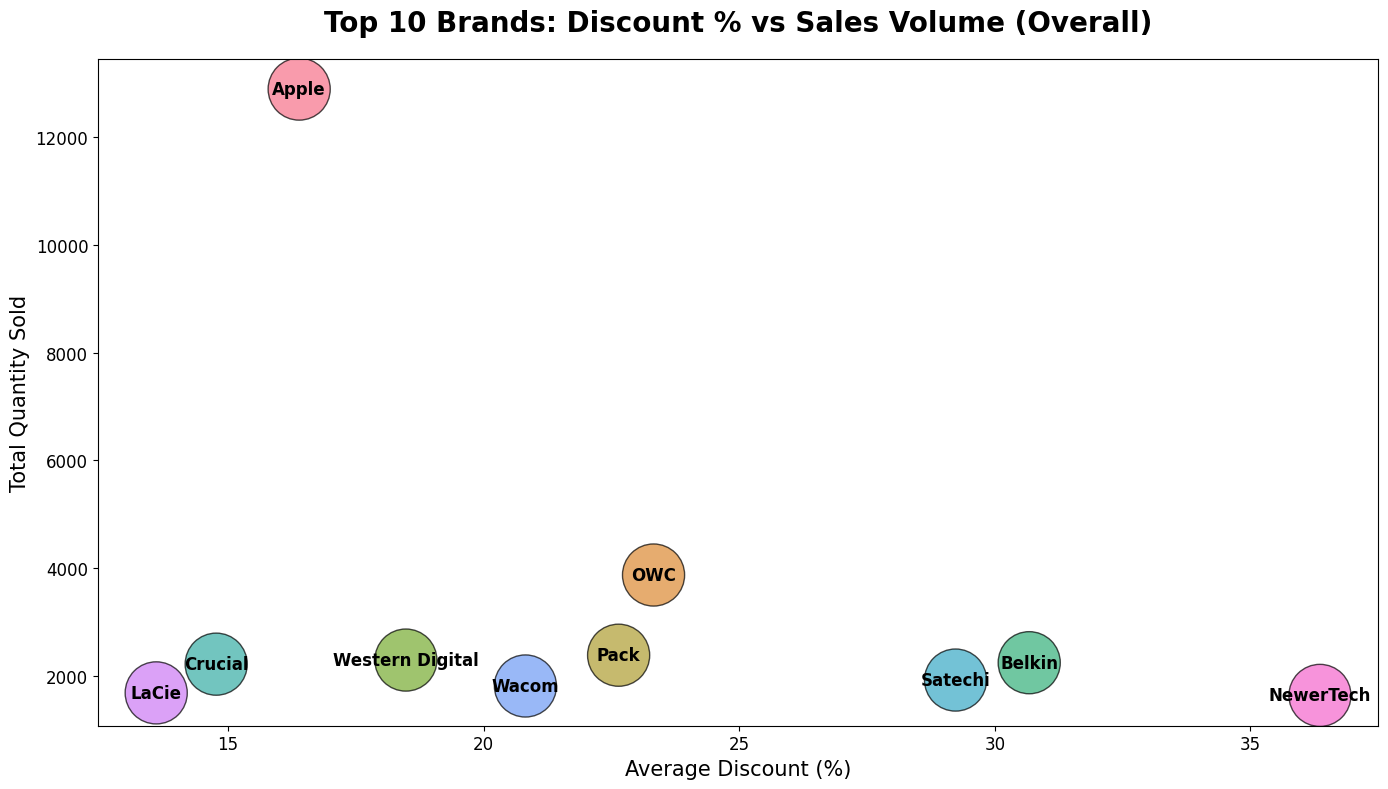

In [11]:

brand_analysis = new_df[new_df['discount'] > 0].groupby('brand_name').agg({
    'discount_percent': 'mean',
    'product_quantity': 'sum',
    'id_order': 'nunique'
}).sort_values('product_quantity', ascending=False).head(10).reset_index()

print(brand_analysis)

# Visualization
plt.figure(figsize=(14, 8))

# Scatterplot without legend
sns.scatterplot(
    data=brand_analysis, 
    x='discount_percent', 
    y='product_quantity',
    size='id_order', 
    hue='brand_name', 
    sizes=(2000, 2000),
    palette='husl',
    alpha=0.7,
    edgecolor='black',
    linewidth=1,
    legend=False
)

# Labels for each brand
for i, row in brand_analysis.iterrows():
    plt.text(
        row['discount_percent'],
        row['product_quantity'], 
        row['brand_name'],
        fontsize=12,
        ha='center',
        va='center',
        fontweight='bold'
    )

plt.title('Top 10 Brands: Discount % vs Sales Volume (Overall)', 
          fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Average Discount (%)', fontsize=15)
plt.ylabel('Total Quantity Sold', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

        brand_name  discount_percent  unit_price  id_order
0            Apple         16.392793  6039723.49     10419
1             Pack         22.641899  2301091.57      2238
2              OWC         23.324971   427700.13      3231
3            Wacom         20.818759   406114.71      1610
4            LaCie         13.596020   366173.24      1550
5               LG         10.901062   302201.50       692
6          Crucial         14.769554   265468.57      1736
7  Western Digital         18.479537   241628.42      1554
8             Dell         18.347729   231961.72       612
9         Synology          4.137860   166236.25       431


C:\Users\robin\AppData\Local\Temp\ipykernel_83460\803743232.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(brand_analysis['brand_name'], rotation=45, ha='right')


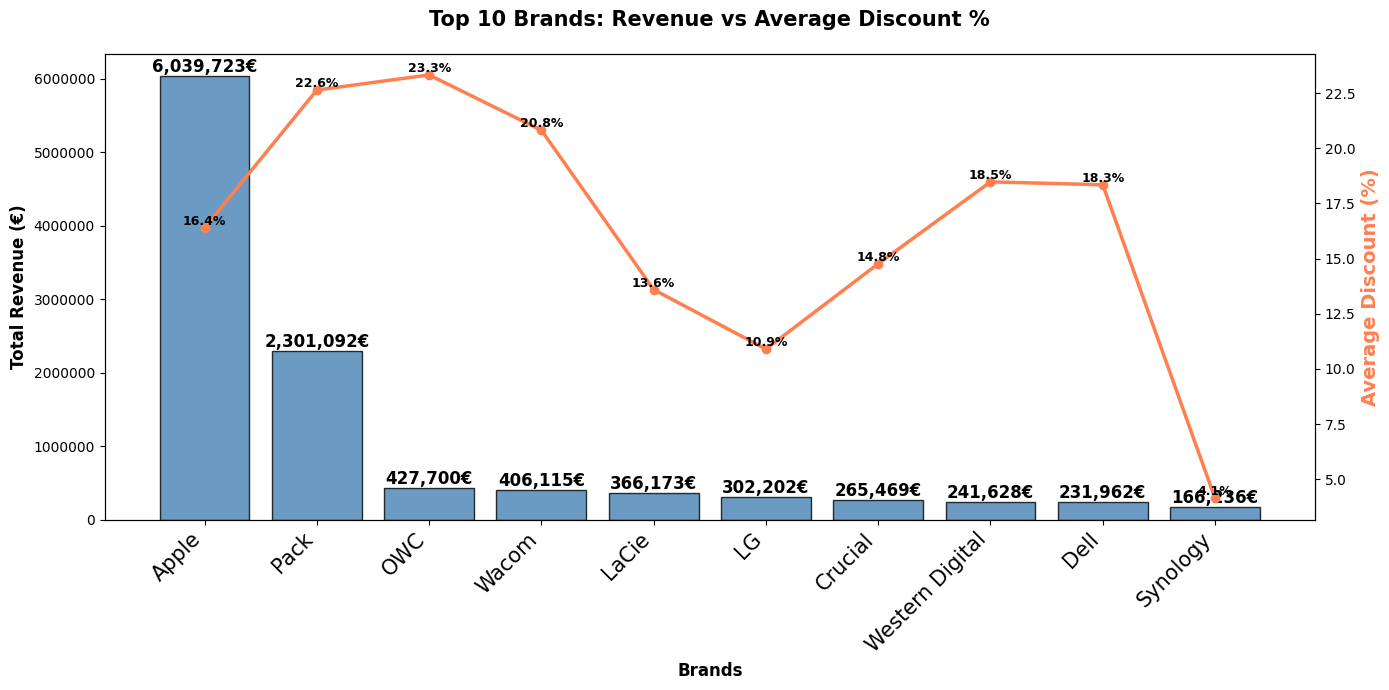

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

brand_analysis = new_df[new_df['discount'] > 0].groupby('brand_name').agg({
    'discount_percent': 'mean',
    'unit_price': 'sum', 
    'id_order': 'nunique'
}).sort_values('unit_price', ascending=False).head(10).reset_index()

print(brand_analysis)

# Visualization mit zwei Y-Achsen
fig, ax1 = plt.subplots(figsize=(14, 7))

# Revenue Balkendiagramm (linke Y-Achse)
bars = ax1.bar(brand_analysis['brand_name'], 
               brand_analysis['unit_price'],
               color='steelblue', 
               alpha=0.8,
               edgecolor='black',
               linewidth=1)

ax1.set_xlabel('Brands', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Revenue (€)', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y')
ax1.set_xticklabels(brand_analysis['brand_name'], rotation=45, ha='right')
ax1.ticklabel_format(style='plain', axis='y')


# Werte auf den Balken
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,.0f}€',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Discount % Linie (rechte Y-Achse)
ax2 = ax1.twinx()
line = ax2.plot(brand_analysis['brand_name'], 
                brand_analysis['discount_percent'],
                color='coral', 
                marker='o', 
                linewidth=2.5,
                markersize=6,
                label='Average Discount %')

ax2.set_ylabel('Average Discount (%)', fontsize=14, fontweight='bold', color='coral')
ax2.tick_params(axis='y')

# Werte auf den Punkten
for i, row in brand_analysis.iterrows():
    ax2.text(i, row['discount_percent'],
            f'{row["discount_percent"]:.1f}%',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Top 10 Brands: Revenue vs Average Discount %', 
          fontsize=15, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

  quarter  unit_price  discount_percent
0  2017Q1  1460247.50         25.601921
1  2017Q2  1342285.45         19.074457
2  2017Q3  2157185.68         23.277461
3  2017Q4  4846835.21         21.284829
4  2018Q1  2818922.01         22.009211


C:\Users\robin\AppData\Local\Temp\ipykernel_83460\1324746414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['quarter'] = new_df['date'].dt.to_period('Q')


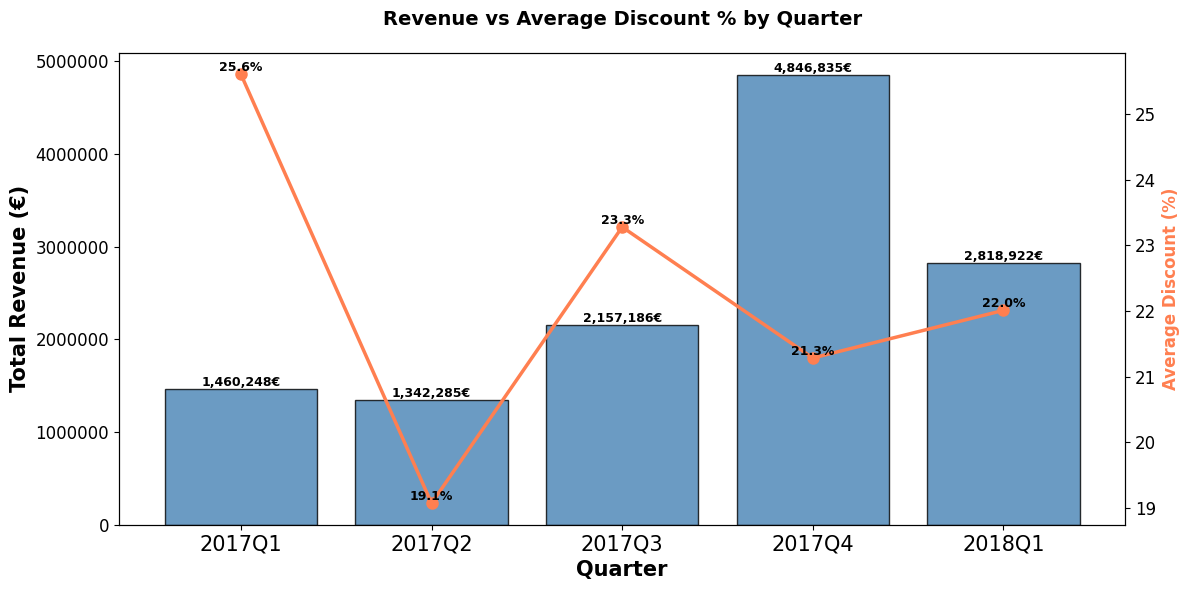

In [13]:
import matplotlib.pyplot as plt

# Quartal aus date extrahieren
new_df['quarter'] = new_df['date'].dt.to_period('Q')

# Revenue und Discount % nach Quartal aggregieren
quarterly_analysis = new_df[new_df['discount'] > 0].groupby('quarter').agg({
    'unit_price': 'sum',
    'discount_percent': 'mean'
}).reset_index()

# Quarter zu String konvertieren für bessere Lesbarkeit
quarterly_analysis['quarter'] = quarterly_analysis['quarter'].astype(str)

print(quarterly_analysis)

# Ein Diagramm mit zwei Y-Achsen
fig, ax1 = plt.subplots(figsize=(12, 6))

# Revenue als Balken (linke Y-Achse)
bars = ax1.bar(quarterly_analysis['quarter'], quarterly_analysis['unit_price'], 
               color='steelblue', alpha=0.8, edgecolor='black', linewidth=1)
ax1.set_xlabel('Quarter', fontsize=15, fontweight='bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.set_ylabel('Total Revenue (€)', fontsize=15, fontweight='bold')
ax1.tick_params(axis='y', labelsize=12)
ax1.ticklabel_format(style='plain', axis='y')

# Werte auf den Balken schreiben
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,.0f}€',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Discount % als Linie (rechte Y-Achse)
ax2 = ax1.twinx()
ax2.plot(quarterly_analysis['quarter'], quarterly_analysis['discount_percent'],
         color='coral', marker='o', linewidth=2.5, markersize=8)
ax2.set_ylabel('Average Discount (%)', fontsize=12, fontweight='bold', color='coral')
ax2.tick_params(axis='y', labelsize=12)

# Werte auf den Punkten schreiben
for i, row in quarterly_analysis.iterrows():
    ax2.text(i, row['discount_percent'],
            f'{row["discount_percent"]:.1f}%',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Revenue vs Average Discount % by Quarter', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

C:\Users\robin\AppData\Local\Temp\ipykernel_83460\217132229.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['discount_bracket'] = pd.cut(
C:\Users\robin\AppData\Local\Temp\ipykernel_83460\217132229.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bracket_analysis = discounted.groupby('discount_bracket').agg({


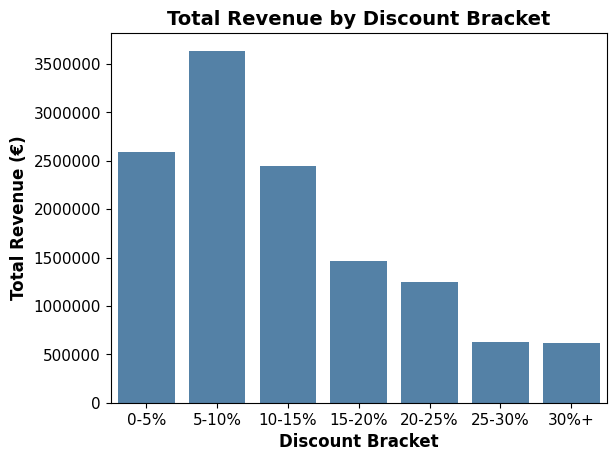

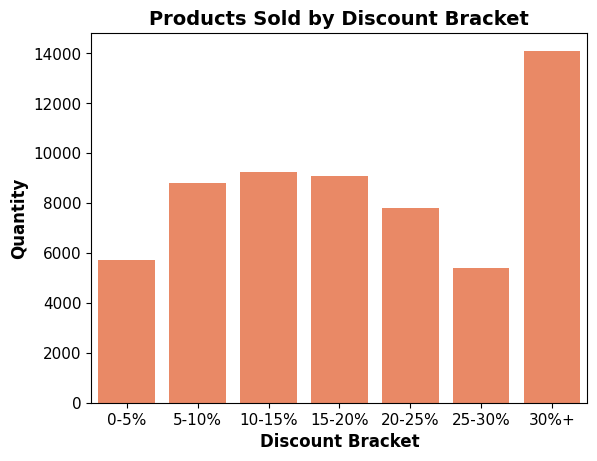

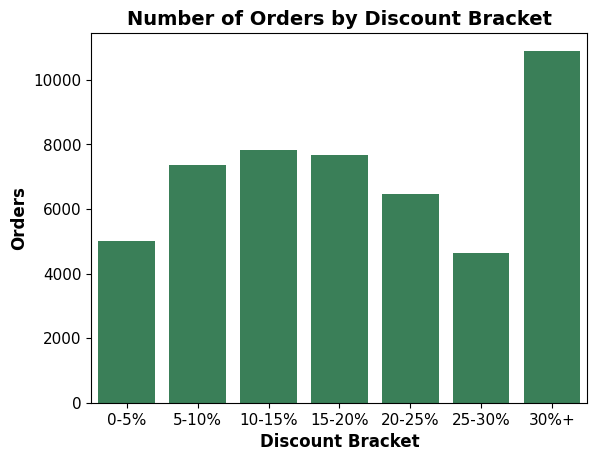

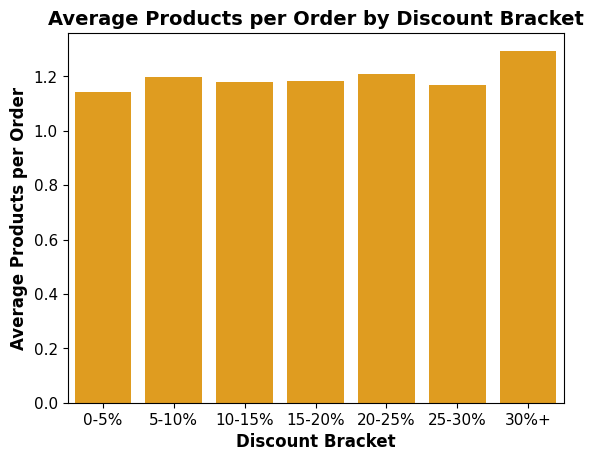

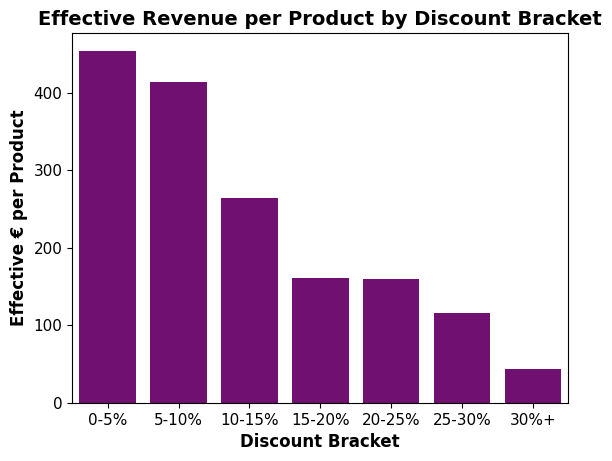

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

new_df['discount_bracket'] = pd.cut(
    new_df['discount_percent'],   
    bins=[0, 5, 10, 15, 20, 25, 30, 100], 
    labels=['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%', '30%+']
)

discounted = new_df[new_df['discount'] > 0]

bracket_analysis = discounted.groupby('discount_bracket').agg({
    'unit_price': 'sum',       
    'product_quantity': 'sum',  
    'id_order': 'nunique'      
}).reset_index()

bracket_analysis['revenue_per_product'] = bracket_analysis['unit_price'] / bracket_analysis['product_quantity']
bracket_analysis['avg_products_per_order'] = bracket_analysis['product_quantity'] / bracket_analysis['id_order']

sns.barplot(data=bracket_analysis, x='discount_bracket', y='unit_price', color='steelblue')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Revenue by Discount Bracket', fontsize=14, fontweight='bold')
plt.xlabel('Discount Bracket', fontsize=12, fontweight='bold')
plt.ylabel('Total Revenue (€)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show();

sns.barplot(data=bracket_analysis, x='discount_bracket', y='product_quantity', color='coral')
plt.title('Products Sold by Discount Bracket', fontsize=14, fontweight='bold')
plt.xlabel('Discount Bracket', fontsize=12, fontweight='bold')
plt.ylabel('Quantity', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show();

sns.barplot(data=bracket_analysis, x='discount_bracket', y='id_order', color='seagreen')
plt.title('Number of Orders by Discount Bracket', fontsize=14, fontweight='bold')
plt.xlabel('Discount Bracket', fontsize=12, fontweight='bold')
plt.ylabel('Orders', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show();

sns.barplot(data=bracket_analysis, x='discount_bracket', y='avg_products_per_order', color='orange')
plt.title('Average Products per Order by Discount Bracket', fontsize=14, fontweight='bold')
plt.xlabel('Discount Bracket', fontsize=12, fontweight='bold')
plt.ylabel('Average Products per Order', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show();

sns.barplot(data=bracket_analysis, x='discount_bracket', y='revenue_per_product', color='purple')
plt.title('Effective Revenue per Product by Discount Bracket', fontsize=14, fontweight='bold')
plt.xlabel('Discount Bracket', fontsize=12, fontweight='bold')
plt.ylabel('Effective € per Product', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show();

In [15]:
completed = new_df[new_df['state'] == 'Completed'].copy()
### Actual revenue
actual_revenue = (completed['unit_price'] * completed['product_quantity']).sum()
### Potential revenue. No discount
potential_revenue = (completed['price'] * completed['product_quantity']).sum()
### Erosion = The money you could have - The money you actually got
erosion = potential_revenue - actual_revenue
### Erosion percentages
erosion_percentage = (erosion / potential_revenue) * 100
print(f"Actual revenue: {actual_revenue} €")
print(f"Potential revenue: {potential_revenue} €")
print(f"Total discount erosion: {erosion} €")
print(f"Revenue lost to discounts: {erosion_percentage} %")

Actual revenue: 13886705.989999998 €
Potential revenue: 16174292.69 €
Total discount erosion: 2287586.700000001 €
Revenue lost to discounts: 14.143349226110741 %
